# Haberman's Survival Data Set

Title: Haberman's Survival Data

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

**Past Usage:**

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

**Attribute Information:**

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Missing Attribute Values: None

Tasks
1. Downloaded Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)


Performed analysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


surv_ds = pd.read_csv("haberman.csv")
surv_ds

,Age,Op_Year,axil_nodes_det,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [73]:
import numpy as np

survived=surv_ds.loc[surv_ds['Surv_status']==1]
died=surv_ds.loc[surv_ds['Surv_status']==2]

#### High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.

In [5]:
surv_ds.shape

(306, 4)

There are 4 features and 305 data points.

In [20]:
#(Q) What are the column names in our dataset?
print (surv_ds.columns)

Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')


In [22]:
print(set(surv_ds['Surv_status']))

{1, 2}


There are two classes 1 and 2. 1 representing the patients survived where as 2 means they didn't

In [25]:
surv_ds['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

In our training set we have 224 people who survived the operation and 81 who didn't. The data set has a bias towards survived patients and is not a balanced data set.

In [74]:
surv_ds.describe()

,Age,Op_Year,axil_nodes_det,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [75]:
survived.describe()

,Age,Op_Year,axil_nodes_det,Surv_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [76]:
died.describe()

,Age,Op_Year,axil_nodes_det,Surv_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


By looking at the prelimary data we can see axil_nodes_det is able to distinguish between survived and died datasets.
We can say 75% of the people who have survived have nodes less than 3 and less than 50% people who died had axillary nodes<5.

Most of the survived patients lie in the age 43-60 and with axiliary nodes between 0 and 3 as well as were operated between years 60 to 66.

Most of the died patients lie in age(46-61) and axilary nodes between 1 and 11 and were operated in years 59-65.

Most people who survived have age 52(+/-)11 i.e 41 to 63 and had axililary nodes between 0 and 2.8+5.8=9.6
Most people who died have age 53(+/-)10 i.e 43 to 63 and had axiliary nodes between 0 and 16.



In [104]:
#Median, Quantiles, Percentiles, IQR.
from statsmodels import robust
feature_list=['axil_nodes_det','Age','Op_Year'];
class_data_list=[survived,died];
class_name_list=['survived','died'];
def median_quantile_percentile_mad(class_data_list,class_name_list,feature):
    for index,class_data in enumerate(class_data_list):
        print("Median for {}".format(class_name_list[index]),np.median(class_data[feature]))
        print("Quantiles for {}".format(class_name_list[index]),np.percentile(class_data[feature],np.arange(0, 100, 25)))
        print("90th percentiles for {}".format(class_name_list[index]),np.percentile(class_data[feature],90))        
        print("10th percentiles for {}".format(class_name_list[index]),np.percentile(class_data[feature],10))

        print("Mad for {}".format(class_name_list[index]),robust.mad(class_data[feature]))

median_quantile_percentile_mad(class_data_list,class_name_list,'axil_nodes_det')

Median for survived 0.0
Quantiles for survived [0. 0. 0. 3.]
90th percentiles for survived 8.0
10th percentiles for survived 0.0
Mad for survived 0.0
Median for died 4.0
Quantiles for died [ 0.  1.  4. 11.]
90th percentiles for died 20.0
10th percentiles for died 0.0
Mad for died 5.930408874022408


In [105]:
median_quantile_percentile_mad(class_data_list,class_name_list,'Age')

Median for survived 52.0
Quantiles for survived [30. 43. 52. 60.]
90th percentiles for survived 67.0
10th percentiles for survived 38.0
Mad for survived 13.343419966550417
Median for died 53.0
Quantiles for died [34. 46. 53. 61.]
90th percentiles for died 67.0
10th percentiles for died 42.0
Mad for died 11.860817748044816


In [106]:
median_quantile_percentile_mad(class_data_list,class_name_list,'Op_Year')

Median for survived 63.0
Quantiles for survived [58. 60. 63. 66.]
90th percentiles for survived 67.0
10th percentiles for survived 58.0
Mad for survived 4.447806655516806
Median for died 63.0
Quantiles for died [58. 59. 63. 65.]
90th percentiles for died 67.0
10th percentiles for died 58.0
Mad for died 4.447806655516806


## Our objective

Our objective is to classify  a new patient belonging to one of the survival status.

## Univariate Analysis

### Histogram, PDF, CDF

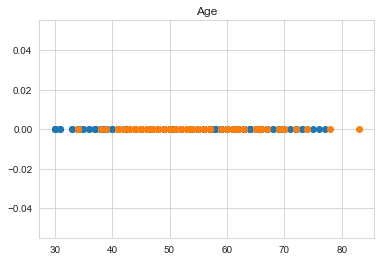

In [78]:
def plot_univar_hist(class_data_list,feature):
    for class_data in class_data_list:
        plt.plot(class_data[feature],np.zeros_like(class_data[feature]),'o');
    plt.title(feature)
    plt.show()
# plt.plot(survived['Age'],np.zeros_like(survived['Age']),'o');
# plt.plot(died['Age'],np.zeros_like(died['Age']),'o');
plot_univar_hist([survived,died],'Age')

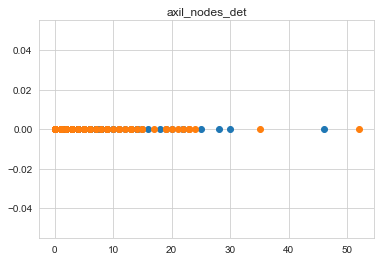

In [79]:
plot_univar_hist([survived,died],'axil_nodes_det')

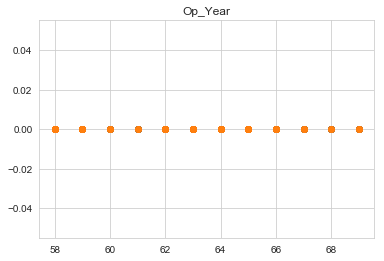

In [80]:
plot_univar_hist([survived,died],'Op_Year')

In [89]:
def plot_histogram(data_set,surv_class,feature):
    sns.FacetGrid(data_set,hue=surv_class,size=5) \
        .map(sns.distplot,feature) \
        .add_legend();
    plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


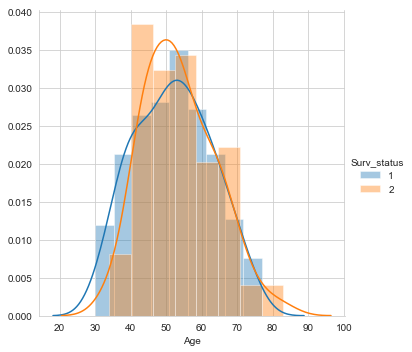

In [88]:
plot_histogram(surv_ds,"Surv_status","Age")

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


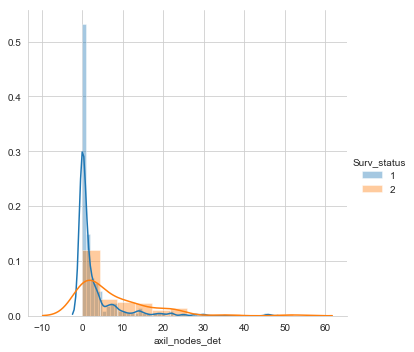

In [62]:
plot_histogram(surv_ds,"Surv_status","axil_nodes_det");

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


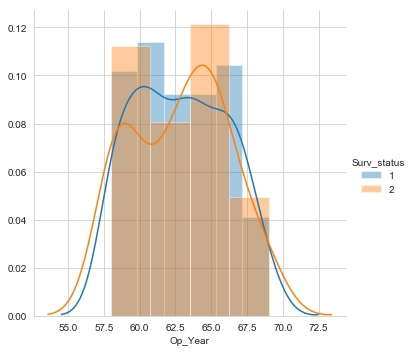

In [60]:
plot_histogram(surv_ds,"Surv_status","Op_Year")

**Observations**

1) None of the features(age,nodes,operation year) are able to individually clearly distinguish the survival and non survival however using axillary nodes detected seems to be able to classify siginifcantly better than others.
All of them overlap though.

In [92]:
def plot_cdf(class_data,feature):
    counts,bin_edges=np.histogram(class_data[feature],bins=20,density=True)
    pdf=counts/(sum(counts));
    print(pdf);
    print(bin_edges);
    cdf=np.cumsum(pdf);
    plt.plot(bin_edges[1:],pdf);
    plt.plot(bin_edges[1:], cdf);
    plt.show()

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]


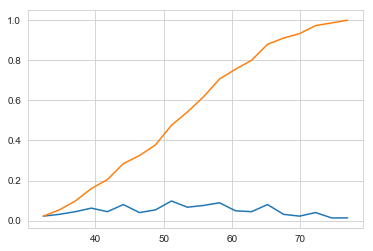

[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


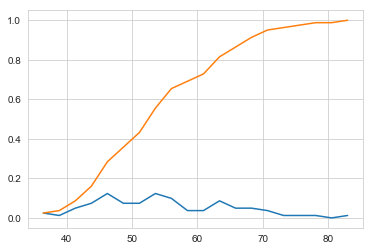

In [93]:
plot_cdf(survived,"Age")
plot_cdf(died,"Age")

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]


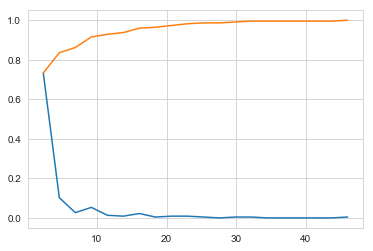

[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


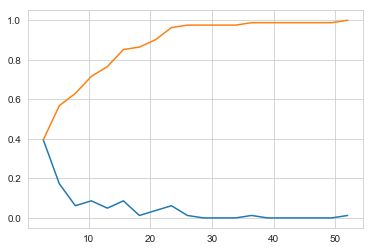

In [94]:
plot_cdf(survived,"axil_nodes_det")
plot_cdf(died,"axil_nodes_det")

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


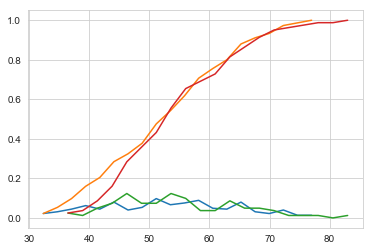

In [95]:
def plot_cdf_all(class_data_list,feature):
    for class_data in class_data_list:
        counts,bin_edges=np.histogram(class_data[feature],bins=20,density=True)
        pdf=counts/(sum(counts));
        print(pdf);
        print(bin_edges);
        cdf=np.cumsum(pdf);
        plt.plot(bin_edges[1:],pdf);
        plt.plot(bin_edges[1:], cdf);
    plt.show()
plot_cdf_all([survived,died],'Age')

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


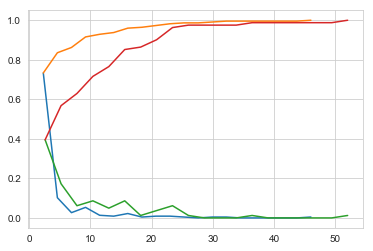

In [96]:
plot_cdf_all([survived,died],'axil_nodes_det')

### Box plot and Whiskers

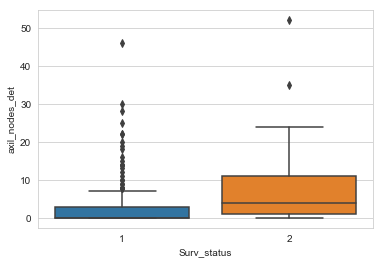

In [107]:
sns.boxplot(x='Surv_status',y='axil_nodes_det', data=surv_ds)
plt.show()

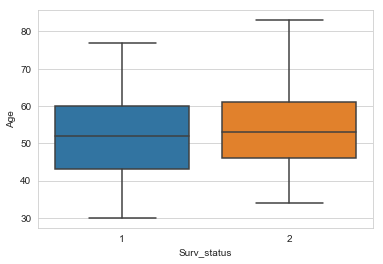

In [109]:
sns.boxplot(x='Surv_status',y='Age', data=surv_ds)
plt.show()

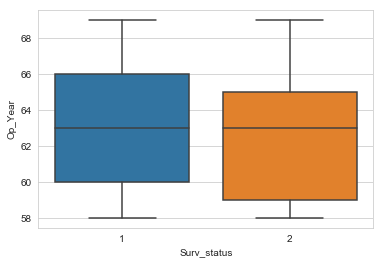

In [110]:
sns.boxplot(x='Surv_status',y='Op_Year', data=surv_ds)
plt.show()

### Violin plots

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


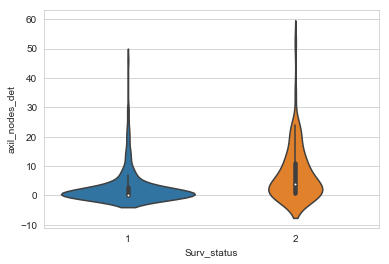

In [112]:
sns.violinplot(x='Surv_status',y='axil_nodes_det', data=surv_ds, size=8)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


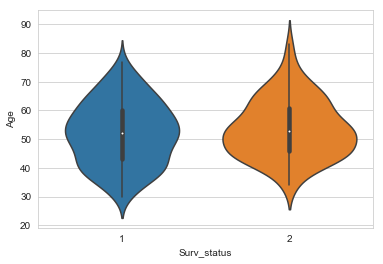

In [113]:
sns.violinplot(x='Surv_status',y='Age', data=surv_ds, size=8)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


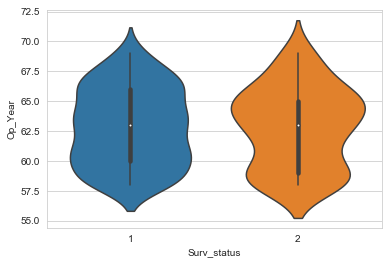

In [111]:
sns.violinplot(x='Surv_status',y='Op_Year', data=surv_ds, size=8)
plt.show()

## Bi-variate analysis

### 2d Scatter plots

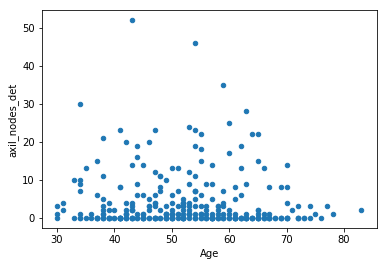

In [9]:
surv_ds.plot(kind="scatter",x='Age',y='axil_nodes_det');
plt.show()

In [85]:
def plot_2d_scatter_plot(data_set,feature_class,feature_x,feature_y):
    sns.set_style('whitegrid');
    sns.FacetGrid(data_set,hue=feature_class,size=4) \
        .map(plt.scatter,feature_x,feature_y) \
        .add_legend();
    plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


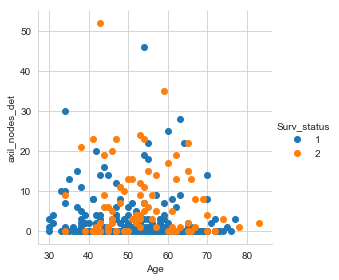

In [98]:
plot_2d_scatter_plot(surv_ds,'Surv_status',"Age","axil_nodes_det")

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


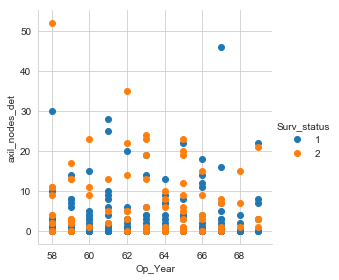

In [87]:
plot_2d_scatter_plot(surv_ds,'Surv_status',"Op_Year","axil_nodes_det")

### Pair-plot

In [90]:
def pair_plot(data_set,feature_class):
    plt.close();
    sns.set_style("whitegrid");
    sns.pairplot(data_set, hue=feature_class, size=3);
    plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/

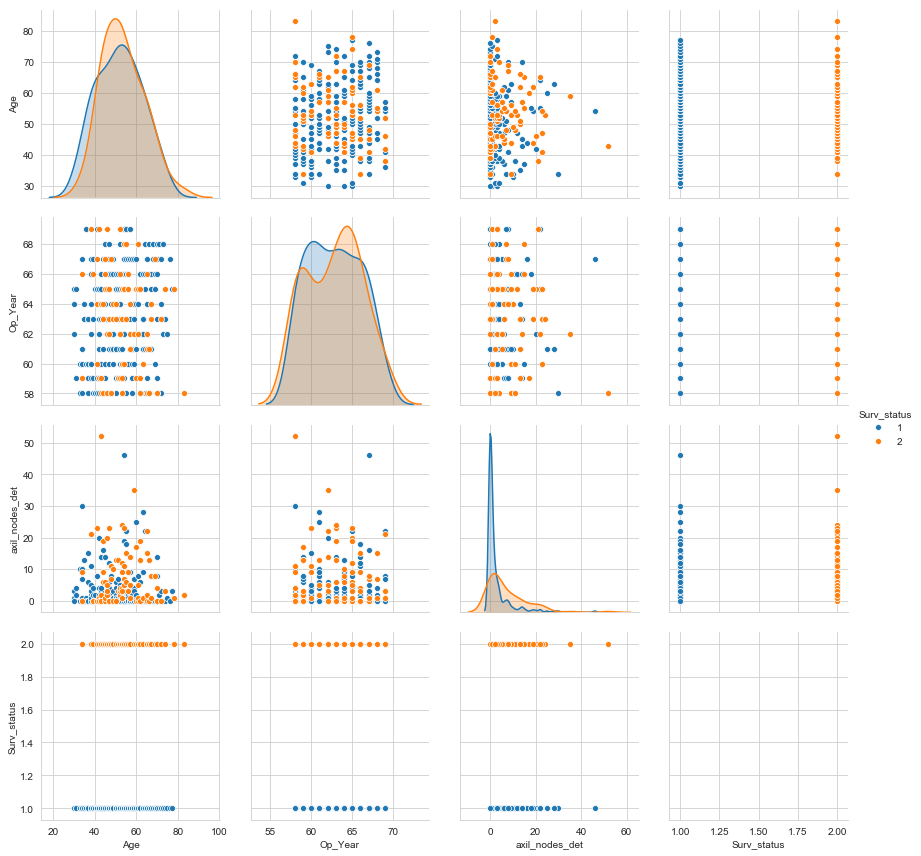

In [91]:
pair_plot(surv_ds,'Surv_status')

**Observations**
Most of the survived data points lie in a parabolic sort of region between age and axiliarly nodes. For eg most survived pateinets lie between with axillioary nodes<3 and with age 43 to 60(the interqaurtile range).

## Conclusions

1) Data set is imbalanced.

2) There is a lot of overlap between features and hence it is not possible to clearly differentiate using the given features.

3) For best curve fitting we can have a parabolic relationship between age and number of nodes.

4) We can't apply simple if else conditions to determine for a new patient.